데이터 및 코드: https://github.com/datascienceabe/study_open/tree/master/Linear_Regression

출처: Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to linear regression analysis (Vol. 821). John Wiley & Sons.<br>
<br>
데이터: http://bcs.wiley.com/he-bcs/Books?action=resource&bcsId=9068&itemId=0470542810&resourceId=36322

2장<br>
목차<br>
1. Regression through origin
2. Hypothesis Testing
3. $R^2$
4. Regressor가 확률 변수 일 때
5. 회귀 분석시 주의 사항

# 1. Regression Through Origin

In [4]:
setwd('C:/Users/bki19/desktop/Linear_Regression/data')

In [5]:
df<-read.csv('./Shelf_Stocking.csv')
colnames(df)<-c('Time','Case')

Shelf-Stocking Data<br>
편의점 알바생 A씨는 일을 효율적으로 하고 싶어합니다.<br>
만약 선반에 있는 음료의 수를 보고 앞으로 언제쯤 다시 음료를 채워 넣어야 할지 안 다면 더 효율적으로 일 할 수 있지 않을까 생각했습니다.

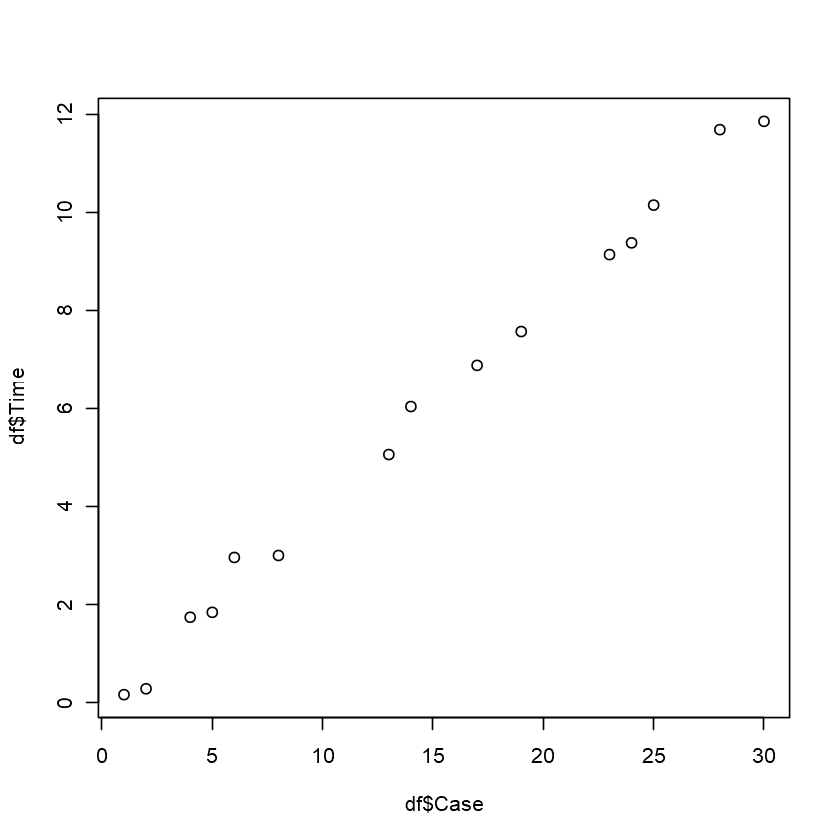

In [7]:
plot(df$Case,df$Time)

데이터를 봤을 때 음료의 수가 많을 수록 채워 넣을 때까지 시간 역시 많아집니다. <br>
이 두 데이터는 정확히 어떤 관계가 있을까요?

<b>Regression through the origin<br></b>

Plot을 봤을 때 Intercept가 필요 없어 보여서 Intercept가 있는 모델과 없는 모델을 고려했습니다.<br>
<br>
모델1: $y=\beta_{1}x+\epsilon$<br>
모델2: $y=\beta_{0}+\beta_{1}x+\epsilon$

In [8]:
fit_or<-lm(Time~0+Case,data=df)
fit<-lm(Time~Case,data=df)

In [6]:
summary(fit_or)
anova(fit_or)


Call:
lm(formula = Time ~ 0 + Case, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5252 -0.2198 -0.1202  0.1070  0.5443 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
Case 0.402619   0.004418   91.13   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2988 on 14 degrees of freedom
Multiple R-squared:  0.9983,	Adjusted R-squared:  0.9982 
F-statistic:  8305 on 1 and 14 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Case,1,741.615371,741.61537058,8305.232,8.012367e-21
Residuals,14,1.250129,0.08929496,NA,NA


Intercept가 없는 모델을 적합 시켰을 때 p-value가 매우 낮아 회귀 계수가 유의했습니다.

In [7]:
summary(fit)
anova(fit)


Call:
lm(formula = Time ~ Case, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4405 -0.1582 -0.1018  0.1357  0.6111 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.093756   0.143577  -0.653    0.525    
Case         0.407107   0.008221  49.519  3.4e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3051 on 13 degrees of freedom
Multiple R-squared:  0.9947,	Adjusted R-squared:  0.9943 
F-statistic:  2452 on 1 and 13 DF,  p-value: 3.399e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Case,1,228.317573,228.31757324,2452.134,3.398506e-16
Residuals,13,1.210427,0.09310975,NA,NA


Intercept가 있는 모델을 적합 시켰을 때 Intercept의 p-value가 매우 낮아 회귀 계수가 유의하지 않았습니다.

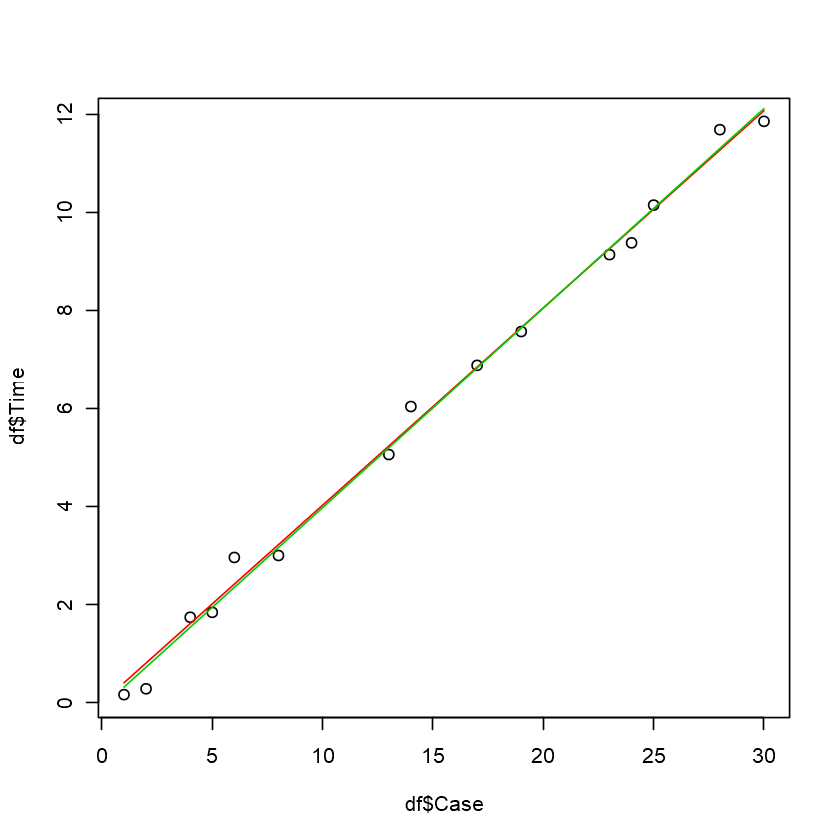

In [12]:
plot(df$Case,df$Time)
lines(df$Case,fitted(fit_or),col=2)
lines(df$Case,fitted(fit),col=3)

- 두 모델의 가설 검정을 통해 Intercept가 없을 때가 더 적합하다는 결론을 얻었습니다.
- MSres를 보면 intercept 없을 때는 0.089로 Intercept있을 때의 0.093 보다 낮았져 intercept가 없는 모델이 더 좋음을 알 수 있습니다.
- 주의할 것은 $R^2$를 통해 모델을 비교하면 안 된다는 것입니다.

# 2. Hypothesis Testing

In [14]:
df<-read.csv('./Rocket_Prop.csv')

In [15]:
df<-df[,c(2,3)]
colnames(df)<-c('Shear_length','Age_Propellant')

The Rocket Propellant Data<br>
로켓 모터에서 Shear strength는 품질에 중요한 요소라고 합니다.<br> Shear strength가 Propellant의 age와 연관성이 있는 것 같아 서로 간의 관계를 확인해 보고자 합니다.

모델: $y=\beta_{0}+\beta_{1}x+\epsilon$

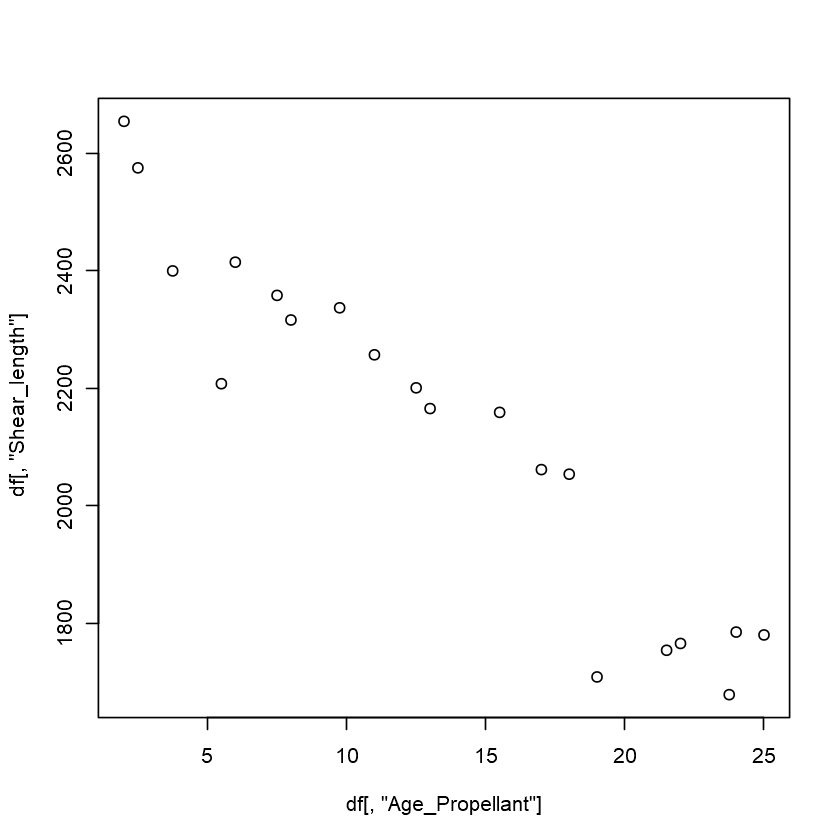

In [19]:
plot(df[,'Age_Propellant'],df[,'Shear_length'] )

In [20]:
fit<-lm(Shear_length~Age_Propellant,data=df)

<b>1) T-test</b>

$H_{0}: \beta_{1}=0$<br>
$H_{a}: \beta_{1}\neq 0$<br>
$T_{0}=\frac{\hat{\beta}_{1} }{\sqrt {\frac{MS_{Res}}{S_{xx}}  }  }\sim t_{n-2} under H_{0}$<br>
여기서 $MS_{Res}= \frac{ \sum(y_{i}-\hat{y})^{2}}{n-2 } $<br>
<br>
Test: $|T_{0}|>t_{\alpha/2 ,n-2}$이면 Reject Null

In [21]:
summary(fit)
qt(0.975,18) # t-test


Call:
lm(formula = Shear_length ~ Age_Propellant, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-215.98  -50.68   28.74   66.61  106.76 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2627.822     44.184   59.48  < 2e-16 ***
Age_Propellant  -37.154      2.889  -12.86 1.64e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 96.11 on 18 degrees of freedom
Multiple R-squared:  0.9018,	Adjusted R-squared:  0.8964 
F-statistic: 165.4 on 1 and 18 DF,  p-value: 1.643e-10


[1] 2.100922

- Coefficient: $\hat{ \beta}_{1}=-37.154$=> age of proplellant 때문에 propllant shear length가 평균적으로 감소하는 정도<br>
- t value: $T_{0}=59.48$ => reject $H_{0}$<br>
- p-value : 1.643e-10 => 결론 Shear strength가 Age of the propellant와 선형적인 연관성이 있다는 강한 증거가 있다

<b>2) F-test</b>

$H_{0}: \beta_{1}=0$<br>
$H_{a}: \beta_{1}\neq 0$<br>
$F_{0}=\frac{MS_{R} }{MS_{Res} }\sim F_{1,n-2} under H_{0}$<br>
여기서 $MS_{R}= \frac{ \sum(\hat{y}-\bar{y})^{2}}{1 } $<br>
<br>
Test: $F_{0}>F_{\alpha,1 ,n-2}$이면 Reject Null

In [19]:
anova(fit) #F-test

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age_Propellant,1,1527482.7,1527482.743,165.3768,1.643344e-10
Residuals,18,166254.9,9236.381,NA,NA


$F_{0}=165.3768$ (simple regression에서는 $T_{0}$의 제곱, 하지만 t와 달리 단측 검정에만 사용)<br>
=>reject H0

<b>3) CI for Coefficient <br></b>

$\hat{\beta}_{j}- t_{\alpha/2,n-2}se(\hat{\beta}_{j} ) <\beta_{j}<\hat{\beta}_{j}+ t_{\alpha/2,n-2}se(\hat{\beta}_{j} ) $

In [20]:
confint(fit)

,2.5 %,97.5 %
(Intercept),2534.99540,2720.6493
Age_Propellant,-43.22338,-31.0838


신뢰구간을 무수히 많이 만들었을 때 그 중 95%의 구간이 실제 $\beta_{j}$를 포함하고 있음

<b>4) Confidence Interval for $\sigma$ </b>

$\frac{(n-2)MS_{Res}}{\chi_{\alpha/2,n-2}^2}<\sigma^2<\frac{(n-2)MS_{Res}}{\chi_{1-\alpha/2,n-2}^2}$

In [21]:
sigma <- sigma(fit) 
sigma

n <- dim(df)[1]
k <- dim(df)[2]-1
alpha <- 0.05

lower <-  ((n-(k+1))*(sigma^2) )/( qchisq(alpha/2, df = n-(k+1), lower.tail = FALSE) )
upper <- ((n-(k+1))*(sigma^2 ) )/qchisq(1-alpha/2, df = n-(k+1), lower.tail = FALSE)
confint.sigma <- c(lower, upper)
names(confint.sigma) <- c("lower", "upper")
confint.sigma

[1] 96.10609

lower     upper 
 5273.516 20199.245

<b>5)Interval Estimation for Mean response <br></b>

$\hat{E(y|x_{0})}=\hat{\beta}_{0}+\hat{\beta}_{1}x_{0}$<br>
$Var(\hat{E(y|x_{0})})=\sigma^2 [\frac{1}{n}+\frac{(x_{0}-\bar{x})^2}{S_{xx}}   ] $<br>
$x_{0}$:mean response를 추정하고 싶은 regressor variable의 수준<br>
<br>
$\hat{E(y|x_{0})}-t_{\alpha/2,n-2}\sqrt{MS_{Res} [\frac{1}{n}+\frac{(x_{0}-\bar{x})^2}{S_{xx}}   ]  }<E(y|x_{0})<\hat{E(y|x_{0})}+t_{\alpha/2,n-2}\sqrt{MS_{Res} [\frac{1}{n}+\frac{(x_{0}-\bar{x})^2}{S_{xx}}   ]  }$


In [22]:
x_0<-mean(df[,2])
mean_response <- predict(fit, newdata=data.frame(Age_Propellant=x_0), interval="confidence", level=0.95)
mean_response 

,fit,lwr,upr
1,2131.357,2086.209,2176.506


$|x_{0}-\bar{x}|$이 증가할 수록 신뢰 구간 길어짐 => $x_{0}=\bar{x}$일 때 가장 작음<br>
=>$x_0$와 $\bar{x}$의 거리가 멀어질 수록 CI가 증가한다<br>
=>Extrapolation의 위험성

<b>6) Prediction Interval <br></b>

$\hat{E(y|x_{0})}-t_{\alpha/2,n-2}\sqrt{1+MS_{Res} [\frac{1}{n}+\frac{(x_{0}-\bar{x})^2}{S_{xx}}   ]  }<E(y|x_{0})<\hat{E(y|x_{0})}+t_{\alpha/2,n-2}\sqrt{1+MS_{Res} [\frac{1}{n}+\frac{(x_{0}-\bar{x})^2}{S_{xx}}   ]  }$

In [23]:
pred <- predict(fit, newdata=data.frame(Age_Propellant=x_0), level=0.95, interval = 'prediction')
pred

,fit,lwr,upr
1,2131.357,1924.46,2338.255


CI와 마찬가지로 $|x_{0}-\bar{x}|$이 증가할 수록 신뢰 구간 길어짐<br>
PI가 CI보다 분산이 커 신뢰 구간이 더 넓어짐<br>
$x_0$값을 가진 새로운 propellant는 길이가 1924에서 2338일 것으로 예상 됨

# 3. Coefficient of Determination ($R^{2}$) 

$R^{2}=\frac{SS_{R}}{SS_{T}}=1-\frac{SS_{Res}}{SS_{T} } $

In [24]:
summary(fit)$r.squared 

[1] 0.9018414

$R^2$ 해석과 특징<br>
shear length의 변동성의 90.18%가 회귀 모형에 의해 설명 됨<br>
1. $R^2$은 변수를 추가할 수록 높아짐<br>
2. 따라서 $R^2$가 높다고 더 좋은 모형이 아니고 모형 간의 비교에 사용 못함 <br>
3. regressor의 range에 영향 받음 (x의 범위가 커질 수록 $R^2$ 커짐)<br>
4. 모형의 적합성을 설명 못함 (비선형적으로 관계 있어도 $R^2$ 커짐)

# 4. Regressor가 확률 변수 일 때

In [23]:
df<-read.csv('./Delivery_Time.csv')

In [24]:
colnames(df)<-c('Time','Case')

전국에 음료 자판기를 소유한 유통 업자는 유통 과정을 보면서 원하는 시간에 음료 배달이 오지 않는 문제가 생겼습니다. <br>문제의 원인을 생각하다가 자판기 배달 물량이 많을 수록 배달 시간이 오래 걸리지 않을까 의문이 생겼습니다. <br>
왜나하면 배달 물량이 적재 시간이 오래 걸릴 것이기 때문입니다. <br>
<br>
따라서 25개의 소매점을 랜덤으로 방문하여 배달 물량과 배달 시간에 대한 데이터를 수집했습니다.<br>
이때 소매점을 랜덤으로 선택했는데 배달 물량 (X)를 여전히 컨트롤할 수 있다는 것은 비현실적일 수 있습니다.<br>
X 역시 확률 변수로 취급하는게 맞지 않을까요?

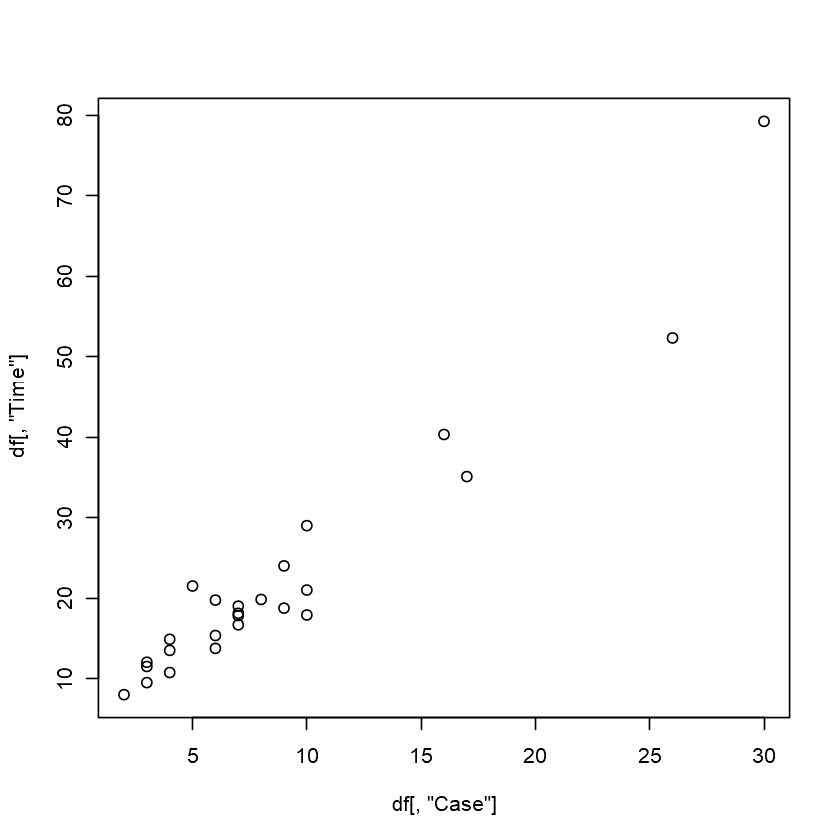

In [25]:
plot(df[,'Case'],df[,'Time'])

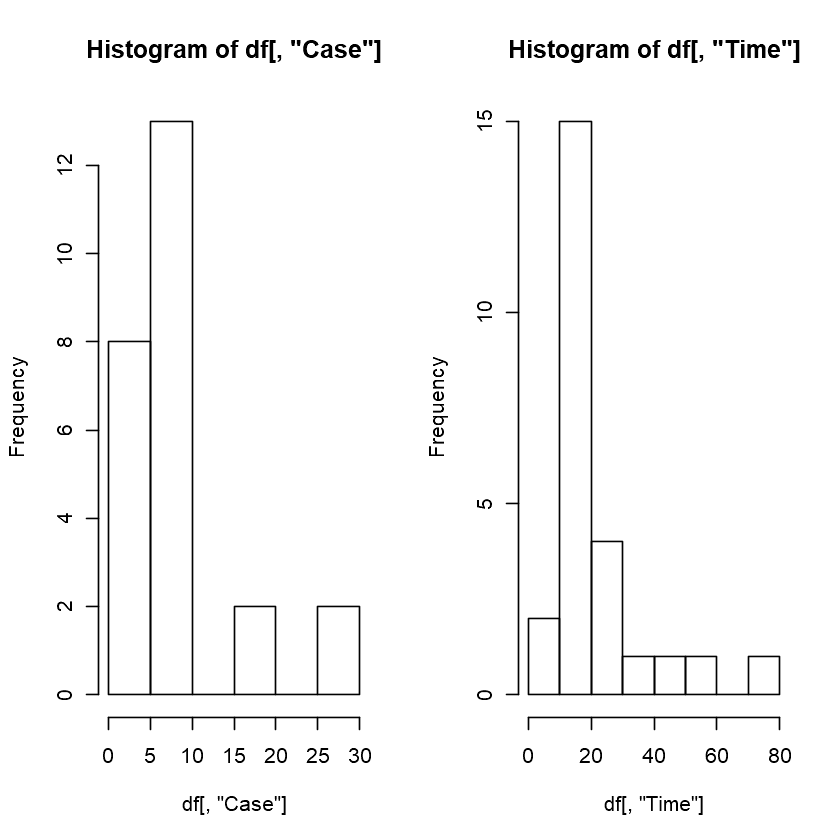

In [27]:
par(mfrow=c(1,2))
hist(df[,'Case']);hist(df[,'Time'])


$(X,Y) \sim Bivariate Normal$이라고 가정하겠습니다<br>
$Y|X$에 대한 분포는 기존과 똑같습니다.<br> 
다만 이제는 X와 Y의 correlation($\rho$)을 추정해야 하는 문제가 생겼습니다.<br>
이때 $\rho$의 추정량 $r$의 제곱 $r^{2}=R^{2}$와 같습니다

Correlation에 대한 가설 검정도 가능합니다<br>
$H_{0}: \rho =0$<br>
$H_{a}: \rho \neq0$<br>
<br>
$T_{0}=\frac{r\sqrt{n-2}}{\sqrt{1-r^2}  }\sim t_{n-2} Under H_{0}  $<br>
여기서 $|T_{0}|>t_{\alpha/2,n-2}$면 reject Null

In [28]:
r=cor(df[,1],df[,2])
r
n=dim(df)[1]
t=(r*(n-2)^0.5) / ((1-r^2)^0.5)
t
qt(0.975,23)

[1] 0.9646146

[1] 17.54555

[1] 2.068658

reject H0=> x와 y의 상관관계가 존재함

# 5. 회귀 분석 사용시 주의 사항

[주의사항]<br>
1.회귀모형은 주로 interpolation을 위해 사용 <br>
2.회귀계수는 먼 x값에 의해 영향을 받음 <br>
3.outlier는 나머지 데이터와 매우 다른 데이터 ::: 나쁜 값일 수도 있고 매우 중요한 데이터일 수도 있음 <br>
4.회귀 분석은 인과관계를 설명하는 것이 아니라 연관성을 말하는 것 (상관관계의 문제를 설명할 수 있을 뿐) <br>